
<div style="text-align: right"> <small> <i>Clinical Trial Data Analysis Using R and SAS</i> </small> </div>

# 9 Bayesian Methods in Clinical Trials

## Contents
 
* [9.1 Bayesian Models](#9.1-Bayesian-Models)
   * [9.1.1 Bayes' Theorem](#9.1.1-Bayes'-Theorem)
   * [9.1.2 Posterior Distributions for Some Standard Distributions](#9.1.2-Posterior-Distributions-for-Some-Standard-Distributions) 
   * [9.1.3 Simulation from the Posterior Distribution](#9.1.3-Simulation-from-the-Posterior-Distribution)

* [9.2 R Packages in Bayesian Modeling](#9.2-R-Packages-in-Bayesian-Modeling)
   * [9.2.1 Introduction](#9.2.1-Introduction)
   * [9.2.2 R Packages using WinBUGS](#9.2.2-R-Packages-using-WinBUGS)
   * [9.2.3 MCMCpack](#9.2.3-MCMCpack)

* [9.3 MCMC Simulations ](#9.3-MCMC-Simulations)    
   * [9.3.1 Normal-Normal Model](#9.3.1-Normal-Normal-Model)
   * [9.3.2 Beta-Binomial Model](#9.3.2-Beta-Binomial-Model)

* [9.4 Bayesian Data Analysis](#9.4-Bayesian-Data-Analysis)
   * [9.4.1 Blood Pressure Data: Bayesian Linear Regression](#9.4.1-Blood-Pressure-Data:-Bayesian-Linear-Regression)
   * [9.4.2 Binomial Data: Bayesian Logistic Regression](#9.4.2-Binomial-Data:-Bayesian-Logistic-Regression)
   * [9.4.3 Count Data: Bayesian Poisson Regression](#9.4.3-Count-Data:-Bayesian-Poisson-Regression)
   * [9.4.4 Comparing Two Treatments](#9.4.4-Comparing-Two-Treatments)
         
* [9.5 Summary and Discussion](#9.5-Summary-and-Discussion)         
* [9.6 Appendix: SAS Programs](#9.6-Appendix:-SAS-Programs)         

## 9.1 Bayesian Models

### 9.1.1 Bayes' Theorem

  $$P(H \mid E) = \frac{P(E \mid H)P(H)}{P(E)} = \frac{P(E \mid H)P(H)}{P(E \mid H)P(H)+P(E \mid H^{c})P(H^{c})}$$

* $P(H)$: estimated as the proportion of patients having breast cancer ( $0.01$ ) 
* $P(E)$: could be estimated as the proportion of patients with a positive mammogram

가정 
  * $P(E \mid H) = 0.95$ (실제 유방암 환자가 유방암 양성 진단을 받을 확률)
  * $P(E^{c} \mid H^{c}) = 0.99$ (실제 정상인이 유방암 음성 진단을 받을 확률)
  \begin{align*}
      P(H \mid E) & = \frac{P(E \mid H)P(H)}{P(E)} = \frac{P(E \mid H)P(H)}{P(E \mid H)P(H)+P(E \mid H^{c})P(H^{c})} 
               = \frac{0.95 \times 0.01}{0.95\times 0.01 + (1-0.99)\times(1-0.01)} = 0.49\\
      P(H^{c} \mid E^{c})& = \frac{P(E^c \mid H^c)P(H^c)}{P(E^c)} = \frac{P(E^c \mid H^c)P(H^c)}{P(E^c \mid H^c)P(H^c)+P(E^c \mid  H^{c})P(H^{c})} 
               = \frac{0.99 \times (1-0.01)}{0.99\times (1-0.01) + (1-0.95)\times 0.01} = 0.999
  \end{align*}
  
     

참고
 * $P(E \mid H)$: 관측치 $y$, 모수 $\theta$ 가능도 함수(likelihood function) $L(\theta) = L(\theta \mid y)$
 * $P(H)$: 모수 $\theta$에 대한 사전 분포(prior distribution) $\pi(\theta)$
 * $P(H|E)$ : 사후분포 (posterior ditribution)  $\displaystyle p(\theta \mid y) = \frac{L(\theta) \pi(\theta)}{\int L(\theta) \pi(\theta) d\theta} \propto L(\theta)\pi(\theta)$ (posterior $\propto$ likelihood $\times$ prior)
    > $\int L(\theta) \pi(\theta) d\theta$: 정규화 상수(normalization constant)

### 9.1.2 Posterior Distributions for Some Standard Distributions

#### 9.1.2.1 Normal Distribution with Known Variance

* $Y_i \sim N(\theta, \sigma^2)$, $\sigma$ known
  1. Noninformative or reference prior ($\pi(\theta)=1$)
      * $p(\theta \mid y) =  N(\bar{y}, \sigma^2 / n)$
      * $100(1-\alpha)\%$ credible interval: $\bar{y} \pm z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$
  2. conjugate prior ($\pi(\theta) = N(\theta_0, \tau^2)$)
      * $p(\theta \mid y) \propto  N(\mu_P, \sigma_{P}^2)$
      * $\mu_P = w\bar{y} + (1-w)\theta_0$, $\sigma_P^2 = \frac{1}{\frac{n}{\sigma^2}+{1}{\tau^2}}$
      * $w=\frac{n/\sigma^2}{(1/\tau^2 + n/\sigma^2)}$

#### 9.1.2.2 Normal Distribution with Unknown Variance

* $Y_i \sim N(\theta, \sigma^2)$, $\sigma$ unknown
  1. Noninformative or reference prior 
      * $\pi(\mu, \sigma) \propto 1/\sigma$
      * $p(\mu, \sigma \mid y) = p(\sigma \mid y)p(\mu \mid \sigma, y)$     
      * $\sigma \mid y \sim (n-1)s^2/\chi_{n-1}^2$, $\mu \mid \sigma, y \sim N(\bar{y}, \sigma^2/n)$
      * $\sigma$에 대해 integrate $\displaystyle \rightarrow \mu = \bar{y} + \frac{s}{\sqrt{n}}T_{n-1}$, $T_{n-1} \sim t_{n-1}$
      * $100(1-\alpha)\%$ credit interval: $\displaystyle \bar{y} \pm t_{n-1, \alpha/2}\frac{s}{\sqrt{n}}$

#### 9.1.2.3 Normal Regression

* simple linear regression model:
  * $\epsilon \sim N(0, \sigma^2)$ with 관측치 $(y_i, x_{1i},...,x_{pi})$
  * $\beta=(\beta_0, \beta_1,...,\beta_p) \rightarrow \hat{\beta}= (X^{T}X)^{-1}{X^T}Y\quad (\widehat{\sigma}^2 = s^2 = \frac{SSR}{n-p-1}$)
* Bayesian inference, 
  * noninformative or usual reference prior: $\pi(\beta, \sigma) \propto \sigma^{-1}$
  * $\sigma^2 \mid \text{data} \sim (n-p-1)s^2/\chi_{n-p-1}^2$
  * $\beta_i \sim \hat{\beta_i} + s_iT_{n-p-1}, \mbox{ where }s_i^2 = s^2(X^{T}X)^{-1}_{ii}$
  * $100(1-\alpha)\%$ credit interval: $\hat{\beta}_i \pm t_{\alpha/2}s_i$

#### 9.1.2.4 Binomial Distribution

* $y \sim Bin(n, \theta)$, $\sigma$ unknown
  1. Noninformative or reference prior 
    * $p(\theta \mid y) = Beta(y+1, n-y+1)$
      > $Beta(a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}x^{a-1}(1-x)^{b-1}dx$
  2. conjugate prior $\pi(\theta) \propto \theta^{a-1}(1-\theta)^{b-1}$
    * $p(\theta \mid y) = Beta(a+y, b+n-y)$

#### 9.1.2.5 Multinomial Distribution

* $y \sim Multinomial(n, \theta)$, $y=(y_1,...,y_p), \theta=(\theta_1,...,\theta_p)$
  1. Noninformative or reference prior $\pi(\theta) \propto 1$
    * $p(\theta \mid y) = \theta_1^{y_1} \cdots \theta_p^{y_p}$
  2. conjugate prior $\pi(\theta) \propto \theta_1^{\alpha_1-1} \cdots \theta_p^{\alpha_p-1}$, $Dirichlet(\alpha_1, ..., \alpha_p)$
    * $p(\theta \mid y)= Dir(\alpha_1 + y_1, ..., \alpha_p +y_p)$

### 9.1.3 Simulation from the Posterior Distribution

**Statistical inferences on $g(\theta)$** from a posterior distribution through **simulation**
- draw random sample of size $N$ as $\theta_1,\dots,\theta_N$ from the posterior distribution $p(\theta|y)$
- estimate $E[g(\theta)|y]$  by $\displaystyle \frac{\sum_i g(\theta_i)}{N}$ 
- approximate the posterior distribution for $g(\theta)$ by a histogram of the values $g(\theta_1),\dots, g(\theta_N)$
- make statistical inferences from this sample.

**Challenge for the simulation approch** : to draw samples from $p(\theta|y)$

**common four methods**
- direct simulation
- importance sampling
- Gibbs sampling
- Metropolis-Hastings sampling


#### 9.1.3.1 Direct Simulation

`directly simulate` from the posterior distribution
> provided it can be linked to known distributions  that can be easily simulated

**Example** : a simple two-treatment randomized clinical trial setting with $n$ patients from treatment 1 and $m$ from treatment 2

* **Data** 
  - treatment 1: $n$, $X_1,...,X_n \sim N(\mu_X, \sigma_X^2)$ <br>
  - treatment 2: $m$, $Y_1,...,Y_m \sim N(\mu_Y, \sigma_Y^2)$
* **Prior**
  - noninformative or reference prior($\pi(\mu_X, \mu_Y, \sigma_X, \sigma_Y) \propto  \frac{1}{\sigma_X \sigma_Y}$)
* **Interest** in a clinical trial
  - mean treatment difference $\delta = \mu_X - \mu_Y$
  - posterior distribution $\pi(\delta \mid \text{data})$
* **marginal posterior distribution** $p(\mu_X,\mu_Y|data)$ 
  - derived by multiplying the likelihood by the posterior distribution and integrating out $\sigma_X$ and $\sigma_Y$
  - $\mu_X$ and $\mu_Y$ are independent
  \begin{align*}
      \mu_X &\sim \bar{x} + \frac{s_x}{\sqrt{n}}T_{n-1}\\
      \mu_Y &\sim \bar{y} + \frac{s_y}{\sqrt{m}}T_{m-1}
  \end{align*}
  - $t$-distribution is common and can be easily simulated
* **Direct Simulation**
  * Step 1: Randomly draw samples 
      $$T_X^1, \dots, T_X^N \mbox{ from } t_{n−1},\quad T_Y^1, \dots, T_Y^N\mbox{ from } t_{m−1}$$,
  * Step 2: Calculate 
      $$\mu_X^i = \bar{x} + \frac{s_x}{\sqrt{n}}T_X^i,\quad \mu_Y^i = \bar{y} + \frac{s_y}{\sqrt{m}}T_Y^i$$,
  * Step 3: Calculate 
      $$\delta_i = \mu_X^i - \mu_Y^i, i=1,...,N$$
 
* $\delta_i$ from Step 3  
  - samples from the posteriror distribution $\pi(\delta|data)$
  - use to estimate the posterior mean and a credible interval and to provide any other Bayesian inference

#### 9.1.3.2 Importance Sampling

In the case that direct simulation is not feasible, *Importance sampling* with Monte Carlo simulation may be used.


**Example** : the posterior distribution $f(\theta)=p(\theta|y)\propto L(\theta)\pi(\theta)$ 
* too difficult to simulate from $f$
* randomly draw samples $\theta_1,\dots, \theta_N$ instead from an *importance* density $s$
  > $s(z)$ : importance function
  > - another density function
  > - close to $f$ in form
  > - eacy to simulate
  > - $\displaystyle E[g(Z)] = \int g(z) f(z) dz =\int \frac{g(z)f(z)}{s(z)} s(z) dz \approx \frac{1}
      {N}\sum_i\frac{g(z_i)f(z_i)}{s(z_i)}$
* $\displaystyle E[g(\theta) \mid y] \approx \frac{\sum_i \frac{g(\theta_i)\times L(\theta_i)\pi(\theta_i)}{s(\theta_i)}}{\sum_i \frac{L(\theta_i)\pi(\theta_i)}{s(\theta_i)}}$

**Direct simulation and importance sampling**
- useful when the number of parameters is small
- but intractable when it is large.

#### 9.1.3.3 Gibbs Sampling

* proposed in the landmark paper by Geman and Geman (1984)
* popularized by Gelfand and Smith (1990) 
* easily generalized to any number of parameters as long as their conditional distribution.

**Basic idea** : randomly sample from the conditional distributions

**Example** : wish to draw samples from a bivariate density function $f(x,y)$ 

* start by obtaining $x_0$ and $y_0$
* proceed iteratively in the following fashion
  * at the $t^{th}$ iteration, randomly draw
  $$x_t \sim f(x \mid y_{t-1})$$
  $$y_t \sim f(y \mid x_t)$$
  * repeat $N$ times
* regard $(x_1, y_1),...,(x_N, y_N)$ as an approximate sample from $f(x,y)$
* `burn-in` : discard the first $m$ pairs because the sample pairs are dependent in the begining.
* Estimate $f(x)$
  $$f(x) = \int f(x,y) dy  = \int f(x \mid y) f(y) dy  \approx \frac{\sum_i f(x \mid y_i)}{N}$$

**Gibbs sampling** in Bayesian modeling
- choose $f(\theta_1, \theta_2)$ as the posterior distribution, i.e.$f(\theta_1, \theta_2)= p(\theta_1, \theta_2 \mid y)$

#### 9.1.3.4 Metapolis-Hastings Algorithm

- similar to Gibbs sampling
- utilise a Markov-chain (MC) to generate correlated Monte-Carlo (MC) samples
- referred to as one of the general Markov-chain Monte-Carlo (MCMC) algorithms
- initially proposed by Metropolis et al. (1953)
- generated by Hastings (1970)
- used to generate samples from a distribution $p(\theta)$
  - only known up to a constant $p(\theta)=h(\theta)/C,\ C=\int h(\theta)d\theta$
  - link to Bayesian modeling where $p(\theta)$ is a posterior and $h(\theta)=L(\theta)\pi(\theta)$

The **essence of MH algorithm**
- `choose a working Markov chain` with easily simulated kernel $q(\psi|\theta)$ (the probability of jumping into state $\psi$ from state $\theta$) 
- `modify the chain` to approximate the posterior $p(\theta)$

**Modification of MC**
  - start the selected chain $q$ at an arbitrary point $\theta^{(0)}$
  -  for $i=1,...,M$ repeat:
     - draw a candidate value $\psi\sim q(\psi|\theta^{(i)})$ from the selected arbitrary chain $q$
     obtain $\theta^{(i+1)}$
     $$
     \theta^{(i+1)}=\left\{\begin{array}{lll}
         \psi\quad &\mbox{with probability } \alpha,&\\
         \theta^{(i)}&\mbox{with probability} 1-\alpha& \qquad  \mbox{ where } \alpha = \text{min}\left\{\frac{h(\psi)}{h\left(\theta^{(i)}\right)}\frac{q\left(\theta^{(i)}\mid \psi\right)}{q\left(\psi \mid \theta^{(i)}\right)},1\right\}
     \end{array}\right.
     $$
     That is
     - $\alpha \ge 1$ : accept $\psi$ and set $\theta^{(i+1)} \leftarrow \psi$ <br>
     - $0 < \alpha < 1$ : accept $\psi$ and set $\theta^{(i+1)} \leftarrow \psi$ with probability $\alpha$ <br>
$\ \quad\quad \;\;\;\quad$reject $\psi$ and set $\theta^{(i+1)} \leftarrow \theta^{(i)}$ with probability $1-\alpha$ <br>
    
> **Note** the constant $C$ canceled out in the formula $\alpha$ so that $\int h(\theta)d\theta$ not necessary to be evaluated.


**Choice of the initial MC $q(\psi|\theta)$ kernel**
- Independent MH
\begin{align*}
    q(\psi \mid \theta)& = q(\psi)\quad\mbox{(i.e. independent of the present state of the chain)}\\
    \alpha&=\text{min}\left\{ \frac{h(\psi)}{h\left(\theta^{(i)}\right)}\frac{q\left(\theta^{(i)}\right)}{q(\psi)},1 \right\}
\end{align*}
- Random Walk
  - take into account the MC value previously simulated in generating the next value in the chain
  $$
     \theta^{i+1} = \theta^i + \epsilon_i\quad (\epsilon_i: \mbox{ random perturbation})
  $$
  > ex) *normal random walk chain* 
  > - most common choice of distribution for the MC kernel is $N(0,1)$
  > $$
      \psi|\theta^{(i)}\sim N(\theta^{(i)}, \sigma^2_0), \quad \mbox{ where $\sigma_0$ is some fixed number}
  $$
  $$
      \alpha=\min\left\{\frac{h(\psi)}{h(\theta^{(i)})},1\right\},\quad \mbox{ which is independent of $q$}
  $$
  > - candidate value $\psi$ is drawn from $N(\theta^{(i)},\sigma^2_0)$
  > - $\displaystyle \alpha=\min\left\{\frac{h(\psi)}{h(\theta^{(i)})},1\right\}$
  > - next value $\theta^{(i+1)}$ = $\psi$ with probability $\alpha$, $\theta^{(i)}$ with probability $1-\alpha$

## 9.2 R Packages in Bayesian Modeling

### 9.2.1 Introduction

* 1990년대, 컴퓨터의 발전으로 MCMC 기법 사용 $\uparrow$

### 9.2.2 R Packages using `WinBUGS`

#### 9.2.2.1 `R2WinBUGS`

* the Windows version of **B**ayesian inference **U**sing **G**ibbs **S**ampling (Spiegelhalter et al.(2003))

In [26]:
#install.packages('R2WinBUGS')
#library(R2WinBUGS)
#library(help=R2WinBUGS)

#### 9.2.2.2 `BRugs`

In [24]:
#install.packages('BRugs')
#library(BRugs) 

#### 9.2.2.3 `rbugs`

In [25]:
#install.packages('rbugs')
#library(rbugs)

#### 9.2.2.4 Typical Usage

* The model file is written by the user with syntax from WinBUGS, which is basically R code. 
* The user needs to be good at **programming** in both **R and WinBUGS**.

### 9.2.3 `MCMCpack`

In [29]:
#install.packages("MCMCpack")
library(MCMCpack)

Warning message:
"package 'MCMCpack' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'MCMCpack' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'Rcpp' 1.0.1 is already loaded, but >= 1.0.3 is required


## 9.3 MCMC Simulations
### 9.3.1 Normal-Normal Model

* Normal Distribution with Known Variance인 경우.
* $n=30, \mu=3, \sigma=2$

In [30]:
# set seed to 123
set.seed(123)
# n=30 patients
n = 30
# known sigma
sigma = 2
# population mean
mu = 3
# simulate data
y =  rnorm(n, mu,sigma)
# print the data
# the mean and variance of the simulated data
mean(y)
var(y)

[1] 2.905792

[1] 3.849685

* reasonable to assume that the prior distribution is normal with prior mean $\mu_0=2$ and prior standard deviation $\tau_0 = 0.5$
* 사후 분포: $\mu_P = w\bar{y}+(1-w)\theta_0$, $\sigma^2_P = \frac{1}{\frac{n}{\sigma^2}+\frac{1}{\tau^2}}, \text{where }w=\frac{\tau^2}{\tau^2+\sigma^2/n}$

In [31]:
# the prior parameters
mu0 = 2; tau0 = .5 
# the weight
w           =  tau0^2/(tau0^2+sigma^2/n)
# the posterior mean
muP       =  w*mean(y) + (1-w)*mu0
# the posterior standard deviation
sigmaP = sqrt(1/(1/tau0^2+n/sigma^2))
# direct simulation of posterior normal
Bayes1.norm2norm = rnorm(10000, muP,sigmaP)

* `Bayes1.norm2norm`에 사후 분포에서 추출한 10000개의 데이터를 저장한다.

In [32]:
quantile(Bayes1.norm2norm, c(0.025,0.25,0.5,0.75,0.975))

2.5%      25%      50%      75%    97.5% 
2.007669 2.393942 2.587371 2.789524 3.166842

* `MCnormalnormal()` 함수를 이용하여 사전 정보를 입력한 후, `Bayes2.norm2norm`에 10000개의 추출한 데이터를 저장한다.
* `MCnormalnormal()`: Monte Carlo Simulation from a Normal Likelihood (with known variance) with a Normal Prior

In [33]:
###################################################
# call the function
Bayes2.norm2norm = MCnormalnormal(y, sigma^2, mu0, tau0^2, 10000)
# print the summary
summary(Bayes2.norm2norm)

ERROR: Error in MCnormalnormal(y, sigma^2, mu0, tau0^2, 10000): 함수 "MCnormalnormal"를 찾을 수 없습니다


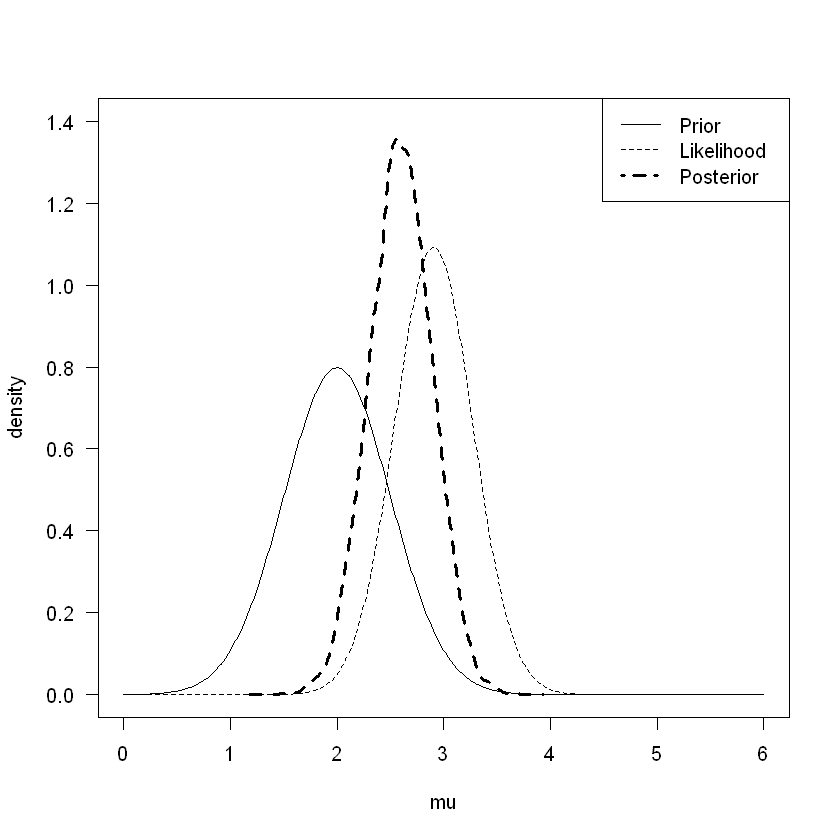

In [79]:
par(mfrow=c(1,2))

x     = seq(0,6,0.01)
plot(x, dnorm(x, mu0,tau0), type="l", lwd=1,las=1, ylim=c(0,1.4),
     xlab="mu", ylab="density")
lines(x, dnorm(x, mean(y), sigma/sqrt(n)), lty=8, lwd=1)
lines(density(Bayes1.norm2norm), lty=8, lwd=3)
legend("topright", c("Prior","Likelihood", "Posterior"), lwd=c(1,1,3), 
       lty=c(1,5,4))

x     = seq(0,6,0.01)
plot(x, dnorm(x, mu0,tau0), type="l", lwd=1,las=1, ylim=c(0,1.4),
     xlab="mu", ylab="density")
lines(x, dnorm(x, mean(y), sigma/sqrt(n)), lty=8, lwd=1)
lines(density(Bayes2.norm2norm), lty=8, lwd=3)
legend("topright", c("Prior","Likelihood", "Posterior"), lwd=c(1,1,3), 
       lty=c(1,5,4))

* `Bayes2.norm2norm`와 `Bayes1.norm2norm`으로 각각 그래프를 그려보면 동일한 결과가 나오는 것을 확인할 수 있다.

### 9.3.2 Beta-Binomial Model

* Binomial likelihood + Beta prior = Beta Posterior
* 800mg의 약 처방이 가장 효율적일 때, 각각 0mg, 400mg, 800mg, 1600mg을 투여한 4개의 집단의 대상자 수는 168, 182, 165, 188
* 조사 종료 시점인 4주 후 치료된 환자 수는 69, 113, 120 ,145 이다.
* $\hat{p} = x_3/n_3 = 120/165 = 0.73$

In [28]:
# total patients for each treatment
n  = c(168, 182, 165,188)
# number healed
x = c(69, 113, 120, 145)
# the observed proportion
p = x/n
p

[1] 0.4107143 0.6208791 0.7272727 0.7712766

* $$L(p) \propto p^{x_3}(1-p)^{n_3-x_3}$$
* Suppose that results from prior, smaller trials suggest that the median of the distribution of p is about 0.75 and the 95 percentile is 0.85 for this treatment. 
* prior parameter인 $a$와 $b$에 대한 함수 `obj()`를 생성한다.

In [29]:
# the objective function
obj = function(parm){
a = parm[1]; b = parm[2]
( pbeta(0.50,a,b) -0.75)^2 +( pbeta(0.95,a,b)- 0.85)^2
}

* `optim()`함수를 이용해 최적의 parameter를 구한다. $\rightarrow a=0.062, b=0.183$

In [80]:
# call optim to search the root with initial values at (3,3)
out = optim(c(3,3), obj)
print(out)

Warning message in pbeta(0.5, a, b):
"NaN이 생성되었습니다"
Warning message in pbeta(0.95, a, b):
"NaN이 생성되었습니다"
Warning message in pbeta(0.5, a, b):
"NaN이 생성되었습니다"
Warning message in pbeta(0.95, a, b):
"NaN이 생성되었습니다"


$par
[1] 0.06211388 0.18292668

$value
[1] 2.571625e-10

$counts
function gradient 
     119       NA 

$convergence
[1] 0

$message
NULL



In [81]:
pbeta(0.5,out$par[1], out$par[2])
pbeta(0.95,out$par[1], out$par[2])

[1] 0.7499841

[1] 0.8500024

* $p(p \mid n_3,x_3) \propto L(p) \times \pi(p) \\
= p^{x_3}(1-p)^{n_3-x_3} \times p^{a-1}(1-p)^{b-1} \\
= p^{x_3+a-1}(1-p)^{n_3-x_3+b-1}$
* $beta(x_3 + a, n_3-x_3+b) = beta(120 + 0.062, 165-120+0.183) = beta(120.062,45.183)$

In [32]:
# direct simulation
Bayes1.betabin = rbeta(10000, 120.062, 45.183)
# print the quantiles
quantile(Bayes1.betabin, c(0.025,0.25,0.5,0.75,0.975))

2.5%       25%       50%       75%     97.5% 
0.6561081 0.7032193 0.7269275 0.7499546 0.7910848

* `MCbinomialbeta()` 함수를 이용하여 사전 정보를 입력한 후, `Bayes2.Bayes2.betabin`에 10000개의 추출한 데이터를 저장한다.
* `MCbinomialbeta()`: Monte Carlo Simulation from a Binomial Likelihood with a Beta Prior

In [33]:
# keep the parameters
x3 = 120; n3 =165; a = 0.062; b=0.183
# call the MCbinomialbeta function for 10000 simulation 
Bayes2.betabin = MCbinomialbeta(x3, n3, a, b, mc=10000)
# print the summary
summary(Bayes2.betabin)


Iterations = 1:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.7264082      0.0346317      0.0003463      0.0003463 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.6558 0.7035 0.7275 0.7502 0.7913 


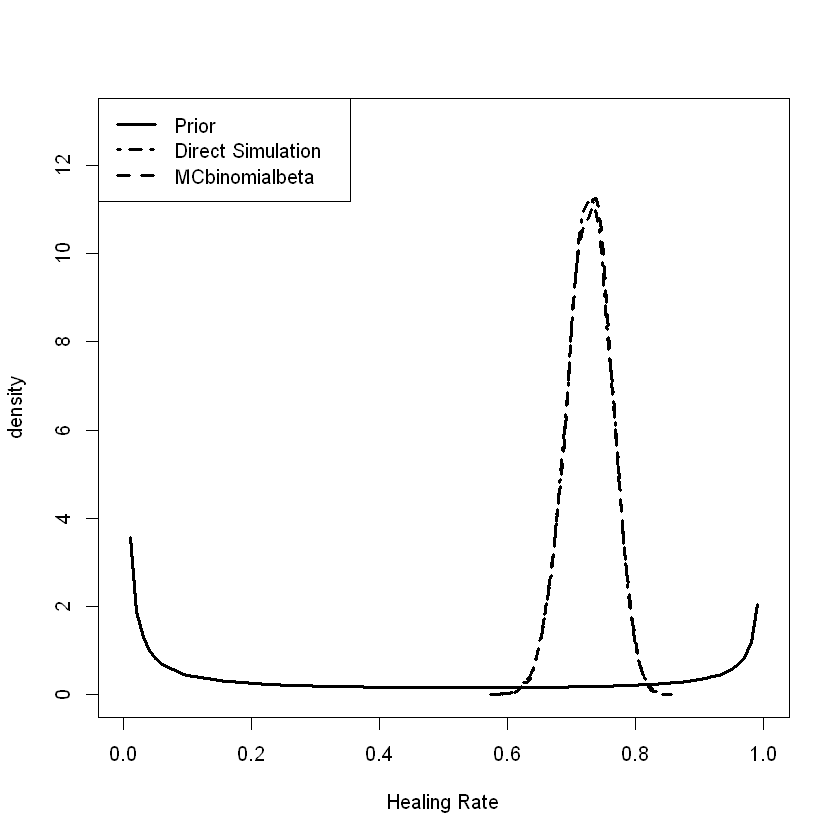

In [34]:
p = seq(0,1,0.01)
plot(p, dbeta(p,a, b),  lwd=3, type="l",ylim=c(0,13),
  xlab="Healing Rate", ylab="density")
lines(density(Bayes1.betabin), lty=4, lwd=3)
lines(density(Bayes2.betabin), lty=8, lwd=3)
legend("topleft", c("Prior", "Direct Simulation","MCbinomialbeta"), 
lwd=3, lty=c(1,4,8))

* Direct Simulation과 Monte Carlo Simulation 두 방법이 거의 동일한 결과를 가져오는 것을 확인할 수 있다.

## 9.4 Bayesian Data Analysis
### 9.4.1 Blood Pressure Data: Bayesian Linear Regression

* $y_i = x'_i \beta + \epsilon_i$
* $\beta \sim N(b_0, B_0^{-1})$
* $\sigma^{-2} \sim Gamma(c_0/2, d_0/2)$

In [35]:
dat = read.csv("DBP.csv",header=T)
# we are interested in the blood pressure change
dat$diff = dat$DBP5-dat$DBP1

In [36]:
# fit the Bayes regression model with 1000 burn-in
BayesMod  = MCMCregress(diff~TRT+Age, dat)
# print the MCMC result
summary(BayesMod)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

               Mean      SD  Naive SE Time-series SE
(Intercept) -6.8126 3.04021 0.0304021      0.0307719
TRTB        10.1195 0.81085 0.0081085      0.0081085
Age         -0.1726 0.06139 0.0006139      0.0006189
sigma2       6.4835 1.60148 0.0160148      0.0173175

2. Quantiles for each variable:

                2.5%     25%    50%    75%    97.5%
(Intercept) -12.7037 -8.8381 -6.823 -4.792 -0.79152
TRTB          8.5432  9.5751 10.119 10.648 11.73873
Age          -0.2954 -0.2131 -0.172 -0.132 -0.05422
sigma2        4.0855  5.3289  6.225  7.329 10.23392


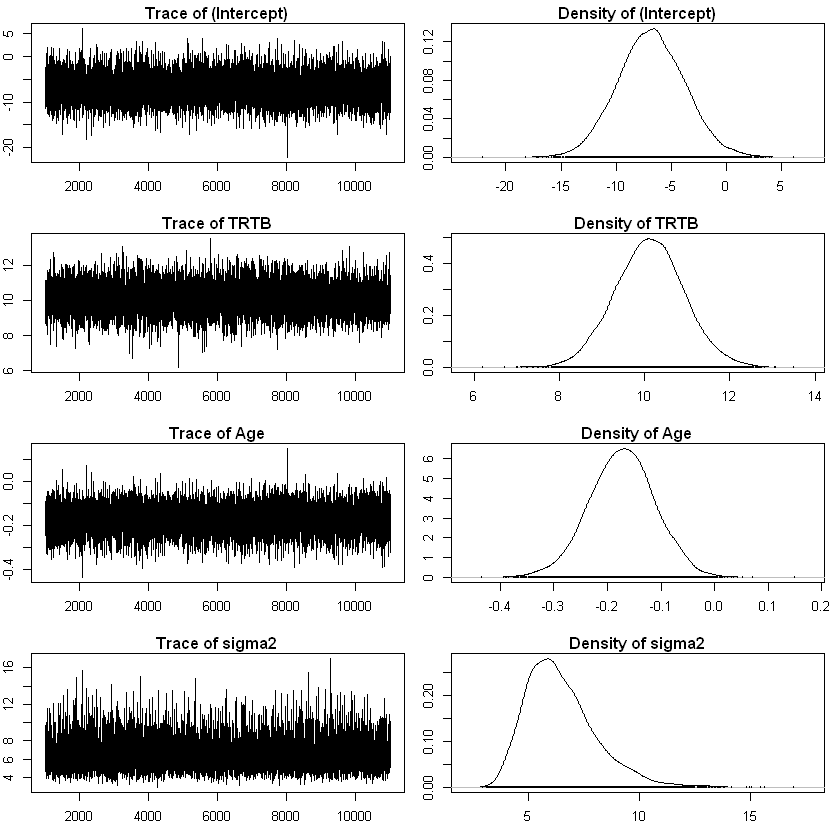

In [37]:
# make the margin
par(mar = c(3,2,1.5,1))
# make the MCMC plot
plot(BayesMod)

* 각각의 회귀계수의 신뢰구간에 0이 표함되지 않는 것을 보아 통계적으로 유의하다고 할 수 있으며,
* 각 회귀계수들의 정규분포를 띄는 것을 알 수 있다.

### 9.4.2 Binomial Data: Bayesian Logistic Regression

* `betablocker` data: 심근경색 발생 후 사망률 감소를 위한 베타 차단제의 22개 센터의 임상 시험 결과
  * Deaths: 사망자 수
  * Total: 환자 수
  * Center: 센터 일련번호
  * Treatment: Control/Treated

In [39]:
library(flexmix)
data("betablocker")  
betablocker$Center = as.factor(betablocker$Center)

In [40]:
# extract center 1
beta1 = betablocker[betablocker$Center == 1,c("Deaths","Total","Treatment")]
# print the center 1 data
beta1 

,Deaths,Total,Treatment
,<dbl>,<dbl>,<fct>
1,3,39,Control
23,3,38,Treated


* 1번 center는 대조군 39명 중 사망자 수는 3명
    * 환자군 38명 중 사망자 수는 3명이다. $\rightarrow$ 새로운 데이터셋 `beta1` 생성

In [82]:
# make a dataframe
beta1 = data.frame(trt = c(rep("TRT", 38),rep("Cont",39)),
                   death = c(rep(1,3), rep(0,38-3), rep(1,3), rep(0,39-3))) 
# print the first 6 observations
head(beta1)

,trt,death
,<chr>,<dbl>
1,TRT,1
2,TRT,1
3,TRT,1
4,TRT,0
5,TRT,0
6,TRT,0


In [83]:
# fit logistic regression
glm.beta = glm(death ~trt,family=binomial,beta1)
# print the result
summary(glm.beta)


Call:
glm(formula = death ~ trt, family = binomial, data = beta1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.4056  -0.4056  -0.4001  -0.4001   2.2649  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.48491    0.60092  -4.135 3.55e-05 ***
trtTRT       0.02817    0.85030   0.033    0.974    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 42.144  on 76  degrees of freedom
Residual deviance: 42.143  on 75  degrees of freedom
AIC: 46.143

Number of Fisher Scoring iterations: 5


* $\hat{\beta} = (-2.485, 0.028), p-value=0.974$
* 대조군(control)에 비했을때 환자군(trt)에 통계적인 차이가 있다고 할 수 없다.
* `MCMClogit()`: Markov Chain Monte Carlo for Logistic Regression

* $y_i \sim Bernoulli(p_i)$
* $p_i = \frac{exp(x'_i\beta)}{1+exp(x'_i\beta)}$
* multivariate normal prior: $\beta \sim N(b_0, B_0^{-1})$, $B_0$(prior precision)
* noninformative prior의 경우 $B_0=0$이다.

In [43]:
 ## Call MCMClogit with default 
Bayes1.beta = MCMClogit(death~trt, data=beta1)  #B0=0(default)
# print the summary for MCMC
summary(Bayes1.beta)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                Mean     SD Naive SE Time-series SE
(Intercept) -2.65158 0.6516 0.006516        0.02067
trtTRT       0.04217 0.9095 0.009095        0.02826

2. Quantiles for each variable:

              2.5%     25%      50%     75%  97.5%
(Intercept) -4.103 -3.0425 -2.59693 -2.1935 -1.545
trtTRT      -1.746 -0.5575  0.02502  0.6467  1.784


* $\hat{\beta} = (-2.652, 0.042)$
* `trtTRT` $95\%$ 신용구간 : (-1.746,1.784) $\rightarrow$ 통계적으로 유의하지 않음

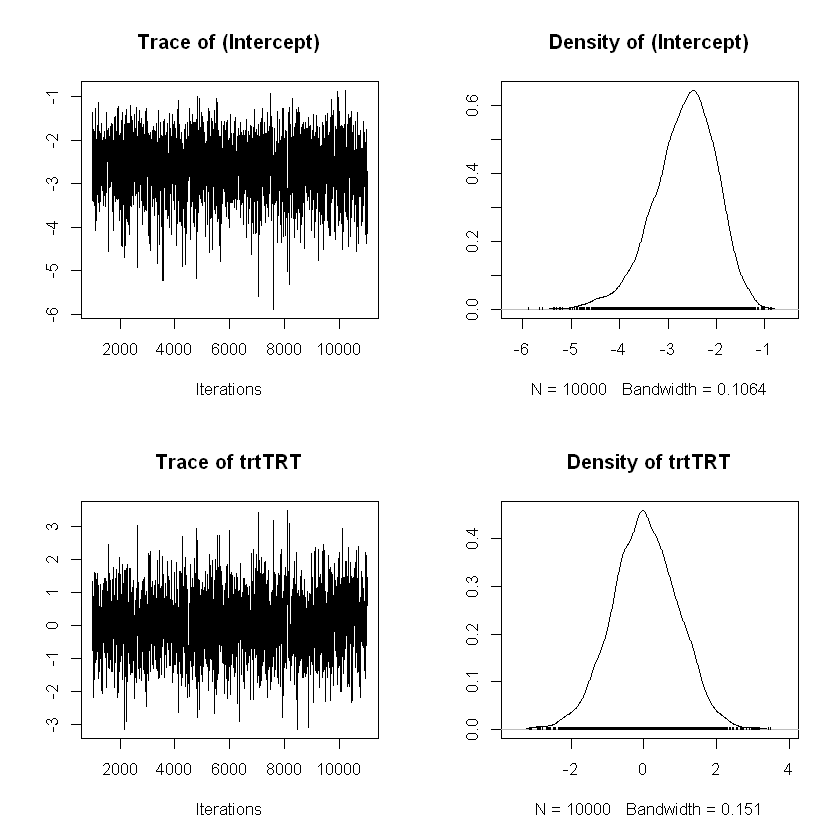

In [44]:
plot(Bayes1.beta)

* 정밀도를 0.001로 지정한 후 MCMC를 통한 로지스틱 분석을 실시하여 결과를 `Bayes2.beta`에 저장한다.

In [45]:
# fit the Bayesian logistic regression with multivariate normal prior
Bayes2.beta = MCMClogit(death~trt, B0=.001,data=beta1) 
# print the fit
summary(Bayes2.beta)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                Mean     SD Naive SE Time-series SE
(Intercept) -2.65404 0.6532 0.006532        0.02076
trtTRT       0.04366 0.9056 0.009056        0.02824

2. Quantiles for each variable:

              2.5%     25%      50%     75%  97.5%
(Intercept) -4.114 -3.0437 -2.59442 -2.1970 -1.544
trtTRT      -1.707 -0.5697  0.04557  0.6311  1.790


* $\hat{\beta} = (-2.654, 0.044)$
* `trtTRT` $95\%$ 신용구간 : (-1.71,1.790) $\rightarrow$ 통계적으로 유의하지 않음

### 9.4.3 Count Data: Bayesian Poisson Regression

* We re-use these data to illustrate the `MCMCpoisson` function in the `MCMCpack` package for Bayesian Poisson regression.
* `MCMCpoisson()`: This function generates a sample from the posterior distribution of a Poisson regression model using a random walk Metropolis algorithm.
* $y_i \sim Poisson(\mu_i)$
  * $\mu_i = exp(x'_i\beta)$
  * $\beta \sim N(b_0, B_0^{-1})$

In [48]:
#install.packages("HSAUR")
library(HSAUR)
data(polyps)

In [49]:
 ## Call MCMCpoissont with default 
Bayes.polyps <- MCMCpoisson(number ~ treat+age, polyps)  #b0=0: noninformative prior
# print the summary for MCMC
summary(Bayes.polyps)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                Mean      SD  Naive SE Time-series SE
(Intercept)  4.53434 0.14788 0.0014788      0.0047939
treatdrug   -1.36115 0.12006 0.0012006      0.0039972
age         -0.03924 0.00604 0.0000604      0.0001958

2. Quantiles for each variable:

                2.5%     25%      50%      75%    97.5%
(Intercept)  4.23876  4.4372  4.53602  4.63074  4.82741
treatdrug   -1.60911 -1.4388 -1.36072 -1.28113 -1.12356
age         -0.05116 -0.0432 -0.03938 -0.03516 -0.02721


* $\hat{\beta} = (4.534, -1.361, -0.039)$ <br>
  $\rightarrow$ `treatdrug` 95% 신용구간 (-1.609, -1.124) / `age` 95% 신용구간(-0.051, -0.027) <br>
  $\rightarrow$ 둘다 통계적으로 유의

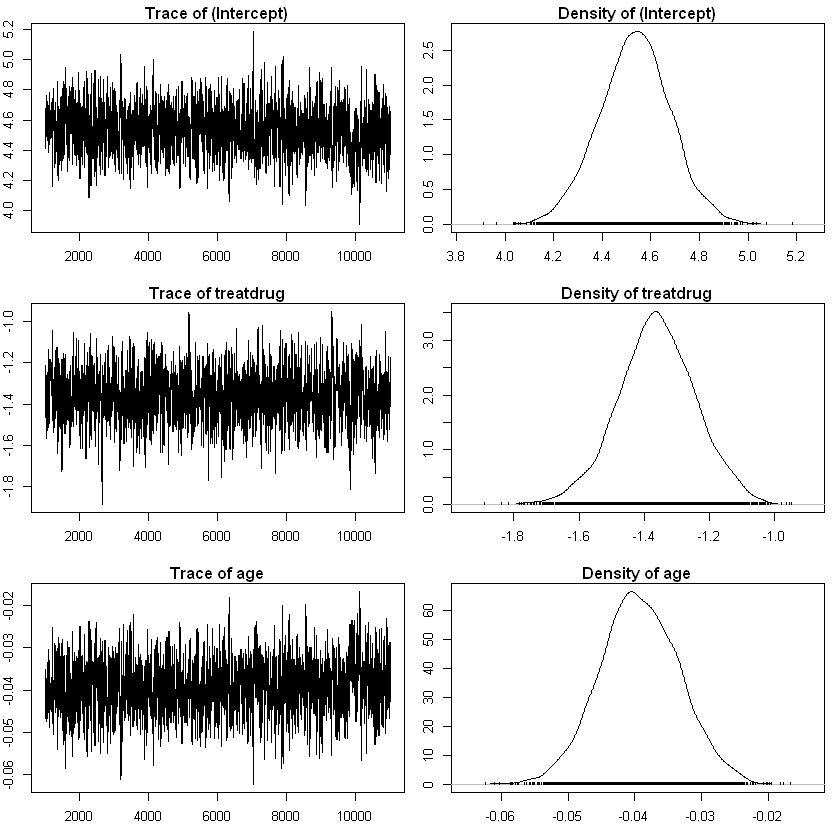

In [50]:
# set a beta margin for plotting
par(mar = c(3,2,1.5,1))
# plot the MCMC
plot(Bayes.polyps)

### 9.4.4 Comparing Two Treatments

* $X \sim Beta(u_X, v_X)$ <br>
  $Y \sim Beta(u_Y, v_Y)$
* $P(X>Y) = \int^{1}_{0}\frac{x^{s_X-1}(1-x)^{t_X-1}}{B(S_x,t_X)}\left( \int^{x}_{0}\frac{y^{S_Y-1}(1-y)^{t_Y-1}}{B(S_Y, t_Y)}dy \right)dx \\
=\frac{B(S_X+S_Y,t_X+t_Y)}{B(s_X,s_Y)B(s_Y,t_Y)S_Y}{_{3}\mathrm{F}_{2}}\left(\begin{matrix} s_X + s_Y, S_Y+t_Y,1  \\ S_Y+1, S_X+t_X+S_Y+t_Y \end{matrix}\mid 1 \right)$
  * $B(s,t)$ is the usual beta function defined as $B(s,t)=\frac{\Gamma(s) \Gamma(t)}{\Gamma{(s+t)}}$
  * ${_{3}\mathrm{F}_{2}}$ is the hypergeometric function with upper parameters $(s_X+s_Y, s_Y+t_Y,1)$ and lower parameter $(s_Y+1+s_X+t_X+s_Y+t_Y)$

In [84]:
# call the hypergeo library
#install.packages("hypergeo")
library(hypergeo)
# make a function call 
pXgtY = function(sx,tx,sy,ty){
tmp1 = beta(sx+sy,tx+ty)/(beta(sx,tx)*beta(sy,ty)*sy)
tmp2 = genhypergeo(U=c(sx+sy,sy+ty,1),L=c(sy+1,sx+tx+sy+ty), check_mod=FALSE,z=1)
tmp1*tmp2
}

* 무정보 사전 정보(noninformative prior)를 이용한다.
*  As previously noted, this leads to a beta posterior distribution which is the same as the likelihood.

In [56]:
# compare 800 mg C to 400 mg C
p800to400 = pXgtY(x[3], n[3]-x[3], x[2],n[2]-x[2])
p800to400
# compare 800 mg C to 0 mg C
p800to0 = pXgtY(x[3], n[3]-x[3], x[1],n[1]-x[1])
p800to0
# compare 1600 mg C to 800 mg C
p1600to800 = pXgtY(x[4], n[4]-x[4], x[3],n[3]-x[3])
p1600to800
# compare 1600 mg C to 400 mg C
p1600to400 = pXgtY(x[4], n[4]-x[4], x[2],n[2]-x[2])
p1600to400

[1] 0.9830853

[1] 1

[1] 0.8299855

[1] 0.999233

1. 400mg 투여보다 800mg 투여의 효과가 더 좋을 확률 0.983
2. 0mg 투여보다 800mg 투여의 효과가 더 좋을 확률 0.999
3. 800mg 투여보다 1600mg 투여의 효과가 더 좋을 확률 0.830
4. 400mg 투여보다 1600mg 투여의 효과가 더 좋을 확률 0.999

* 0.95 이상일 때 차이에 대해 유효하다고 하면 1600mg과 800mg의 효과에 대한 차이는 없다고 할 수 있다.

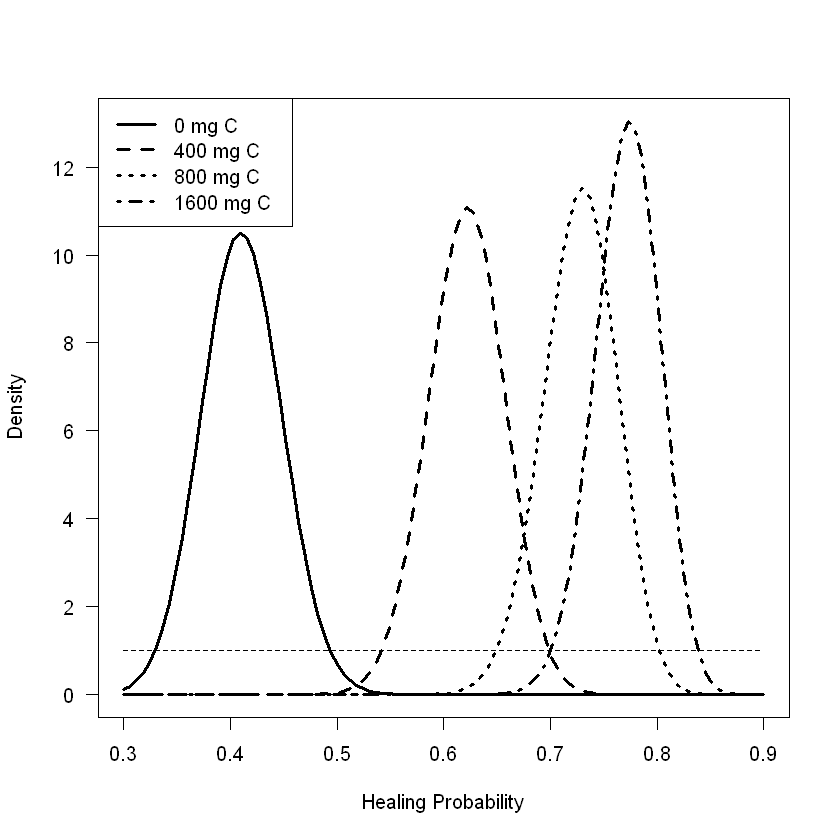

In [57]:
#  make p from 0.3 to 0.9 by 100 points 
n.pts =100
p      = seq(0.3,0.9,length=n.pts)
# the prior and the distributions from 4 treatments
pb0  = dbeta(p,1,1)
pb1  = dbeta(p,x[1],n[1]-x[1])
pb2  = dbeta(p,x[2],n[2]-x[2])
pb3  = dbeta(p,x[3],n[3]-x[3])
pb4  = dbeta(p,x[4],n[4]-x[4])

# the maximum to set the yaxis limit
ymax= max(pb1,pb2,pb3,pb4)
# plot the prior and posterior
plot(p,pb0, lwd=1, lty=8, las=1,type="l",xlab="Healing Probability",
 ylab="Density",ylim=c(0,ymax))
lines(p,pb1, lwd=3, lty=1)
lines(p,pb2, lwd=3, lty=2)
lines(p,pb3, lwd=3, lty=3)
lines(p,pb4, lwd=3, lty=4)
legend("topleft", c("0 mg C","400 mg C", "800 mg C","1600 mg C"), 
lwd=c(3,3,3,3), lty=c(1,2,3,4))